# 머신러닝 프로젝트
### Airbnb (New York City) 데이터셋으로 가격 예측하기

## 프로젝트 구성

노드 강사님의 tip 영상의 프로젝트 진행 순서를 기본으로 하고    
중간중간 제가 해 본 시도들을 더 해 보았습니다.


## 목차

1. 데이터 소개 및 노드의 baseline 및 tip 성능 표시
2. 조원들과 공유 후 적용한 아이디어
3. 적용 과정(강사님의 tip영상의 진행 순서 + 중간중간 아이디어 적용)
4. 결론
5. 회고
6. 참고한 레퍼런스

## 요약 결론
강사님이 도출하신 성능보다는 더 나은 성능의 모델을 도출하지는 못했어요ㅠㅠ엉엉    
하지만 직접 RandomizedSearchCV로 하이퍼파라미터를 찾고 모델을 조정해보는 작업은 재미있었습니다.

## 1. 데이터 소개

Airbnb (New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
-제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
-평가 방식 MSE(평균 제곱 오차/실제 값과 예측값 차이) -> 제곱해 평균
License CC0: Public Domain

### 노드의 baseline 및 tip 성능 표시
#### baseline     
MSE 51046

#### tip     
MSE 42778

## 2. 조원들과 공유 후 적용한 아이디어 
#### <span style = "color:orange;"> (코드 진행과정에서 "스스로 아이디어를 적용한 부분"과 "알게 된 부분"은 주황색으로 표시)</span> 


1. 검증용 데이터 비율이 노드에서는 8:2 이었다. 이걸 7:3으로 조정하면?
2. 하이퍼파라미터를 GridSearchCV나 RandomizedSearchCV로 찾아 조절해보면?
3. 캐글의 다른 사람들의 분석한 자료들을 보며 적용할 부분 찾기

## 3. 적용과정(강사님의 tip영상의 진행 순서 + 중간중간 아이디어 적용)
#### <span style = "color:orange;"> 코드 진행 기본 흐름은 노드 강사님의 tip 영상 흐름과 동일합니다</span> 
#### <span style = "color:orange;"> (코드 진행과정에서 "스스로 아이디어를 적용한 부분"과 "알게 된 부분"은 주황색으로 표시)</span> 

### Step 1. 라이브러리와 데이터 불러오기

In [33]:
# 라이브러리 
import pandas as pd

In [34]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### Step 2. EDA

In [35]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [36]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


## <span style = "color:orange;"> 새로 알게 된 부분: display</span> 
display는 하나의 셀에서 두 데이터를 보고 싶을 때 사용하는 것 같다    
train.head(2)와 test.head(2)를 한 셀에서 실행시키면 test.head(2)만 나온다    
-> 공식문서나 다른 블로그에서 display에 대한 부분을 설명해놓은 곳이 있나 찾아봤는데 적절한 건 찾지 못했다

In [37]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [38]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [39]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

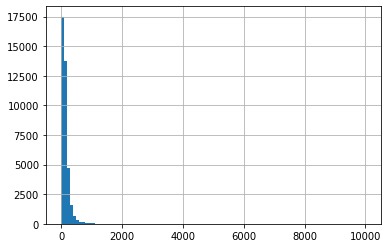

In [40]:
# target(hist)
train['price'].hist(bins=100)

금액의 분포가 좌측으로 쏠려있는 것을 알 수 있다

In [41]:
# target(describe)로 가격에 대한 정보를 살펴보자
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [42]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

host_id가 중복되는 것들이 얼마나 많은지 알 수 있다

### Step 3. 데이터 전처리

### 1. price를 로그데이터로 바꾸기
왜? price의 히스토그램을 봤을 때 가격의 분포가 좌측에 몰려있어서


In [43]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3]) # 로그로 치환해주는 함수
print(np.expm1(np.log1p(train['price'])[:3])) # 로그로 치환된 값을 다시 원래의 수로 돌려주는 함수

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


## <span style = "color:orange;"> 새로 알게 된 부분: 자자, 로그데이터로 바꾼다는게 무슨 뜻이냐</span> 
로그로 치환?

numpy.log1p()    
진수에 1을 더해준다. 보통 진수가 0이 되는 것을 방지하기 위해 사용한다

print(np.log1p(0))    
-> 0.0

print(np.log1p(np.e-1))     
-> 1.0

0을 넣으면 +1이 자동으로 되어 0.0을 반환한다    
e-1을 넣으면 +1이 자동으로 되어 1.0을 반환한다. 밑이 e인 자연로그라고 한다

<AxesSubplot:>

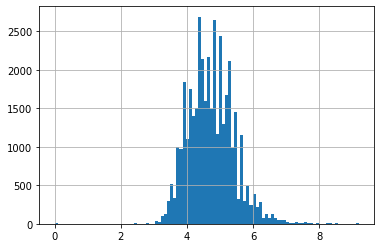

In [44]:
train['price'] = np.log1p(train['price']) # 전체 price 컬럼에 로그데이터 함수 적용
train['price'].hist(bins=100)

이렇게 하면 아까 히스토그램보다 좀 더 고른 분포를 보여준다 = 정규분포에 가깝다

### 2. 결측치가 있는 컬럼 삭제, 결측치를 채울 수 있는 컬럼은 채우기

In [45]:
# 결측치가 있던 컬럼 삭제 (last_review 컬럼) -> 채울 수가 없을 것 같아서 삭제 
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [46]:
# 결측치 채우기 (reviews_per_month 컬럼) -> 이 컬럼은 0으로 채워보자 
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [47]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### 3. 수치형 데이터, 범주형데이터 분리후 전처리
수치형 데이터는 정규화(MinMaxScaler)     
범주형 데이터는 레이블 인코딩

수치형 데이터 확인

In [48]:
# 수치형 피처 선택
# 수치형 데이터와 범주형 데이터 분리 후 민맥스 스케일링 적용할 계획
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

## <span style = "color:orange;"> 새로 알게 된 부분: select_dtyes</span>

공식문서에는 Return a subset of the DataFrame’s columns based on the column dtypes. 이라고 되어 있다    
subset은 부분집합으로 컬럼의 데이터타입에 기초해 데이터프레임의 부분집합을 출력한다고 이해했다    


찾아본 자료의 예시를 적어보면    
#### 데이터프레임에서 숫자형이 아닌 컬럼만 가져오는 경우     
df = df.select_dtypes(include='object')
   
#### 데이터프레임에서 숫자형 컬럼만 가지고 오는 경우     
df = df.select_dtypes(exclude='object')

df = df.select_dtypes(include=['int64', 'float64'])


In [49]:
n_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,4.737628,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,0.694731,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,4.248495,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,4.663439,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.170484,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,9.210440,1250.000000,629.000000,58.500000,327.000000,365.000000


In [50]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
    
]

display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,4.26268,3,3,0.09,2,0


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,4.26268,0.001601,0.004769,0.001538,0.003067,0.0


MinMaxScaler가 적용된 것을 알 수 있다

In [51]:
# 아이디 열 삭제

n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

범주형 데이터 확인

In [52]:
c_train.head(1)
# 아이디가 삭제된 것을 확인할 수 있다

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [53]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


name과 host_name의 결측치 차이가 커서 두 컬럼은 삭제하고     
나머지 세 컬럼에 대해서 레이블 인코딩 진행

In [54]:
# 범주형 데이터 컬럼들 레이블 인코딩 진행
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
    'neighbourhood_group',
    'neighbourhood',
    'room_type'
]

display(c_train.head(1))
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])
    
display(c_train.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


In [55]:
# 쓰지 않을 name, host_name 컬럼 삭제

del_cols = ['name', 'host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

In [56]:
# 분리한 데이터 다시 합치기
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 12) (9779, 11)


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,4.262680,0.001601,0.004769,0.001538,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,5.484797,0.000801,0.101749,0.028718,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,5.017280,0.047238,0.001590,0.003419,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,4.454347,0.002402,0.379968,0.049402,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,3.806662,0.021617,0.000000,0.000000,0.000000,0.000000,1,13,1


In [57]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

## <span style = "color:orange;"> 왜?</span>
train data가 test data보다 컬럼이 1개 더 많았다. target 컬럼이 있었기 때문      
여기에서는 target 컬럼이 price 컬럼     
    
머신러닝 모델에 학습을 시키기 위해서는 train data와 test data의 컬럼의 수가 동일해야 한다     
그래서 train data의 price 컬럼을 target 이라는 변수에 옮겨 담아 놓고    
train data에서는 price 컬럼을 빼주자     

### Step 4. 검증데이터 분리

### 노드에서의 검증데이터는 8:2로 분리

In [34]:
# 검증 데이터 분리
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

## <span style = "color:orange;"> 내가 시도해 본 부분: test_size를 7:3으로 분리하기</span>

In [58]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.3, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((27381, 11), (11735, 11), (27381,), (11735,))

## <span style = "color:orange;"> 내가 시도해 본 부분: RandomizedSearchCVd로 최적의 하이퍼파라미터 찾기</span>

노드의 설명을 보면 xgboost의 하이퍼파라미터에는 아래와 같은 것들이 있다고 한다
- booster (기본값: gbtree) : 부스팅 알고리즘(또는 dart, gblinear)
- objective (기본값: binary:logistic) : 이진분류 (다중분류: multi:softmax)
- max_depth (기본값: 6) : 최대 한도 깊이
- learning_rate (기본값: 0.1) : 학습률
- n_estimators (기본값: 100) : 트리의 수
- subsample (기본값: 1) : 훈련 샘플 개수의 비율
- colsample_bytree (기본값: 1) : 특성 개수의 비율
- n_jobs (기본값: 1) : 사용 코어 수 (-1 : 모든 코어를 다 사용)

In [91]:
from sklearn.model_selection import RandomizedSearchCV

### 랜덤포레스트 하이퍼 파라미터 찾기

In [76]:
#랜덤포레스트용_테스트해볼 파라미터 넣어주기
params={'max_depth':[3, 5, 7],
       'n_estimators':[100, 200, 300, 400, 500]
       }

In [77]:
#랜덤포레스트용_최적의 파라미터 찾기
from sklearn.ensemble import RandomForestRegressor

randonfr = RandomForestRegressor()

In [78]:
grid = RandomizedSearchCV(randonfr, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [79]:
grid.best_params_

{'n_estimators': 500, 'max_depth': 7}

### XGBoost 하이퍼 파라미터 찾기_1번째 시도

In [60]:
#XGBoost용 1번째 시도_테스트해볼 파라미터 넣어주기
params={'learning_rate':[0.07, 0.05],
       'max_depth':[3, 5, 7],
       'n_estimators':[100, 200],
       'subsample':[0.9, 0.8, 0.7]
       }

In [62]:
# XGBoost용 1번째 시도_최적의 파라미터 찾기
from xgboost import XGBRegressor
xgb = XGBRegressor()

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [63]:
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [64]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.07}

### XGBoost 하이퍼 파라미터 찾기_2번째 시도

In [94]:
#XGBoost용 2번째 시도_테스트해볼 파라미터 넣어주기
params={'learning_rate':[0.1, 0.07, 0.05, 0.03],
       'max_depth':[3, 5, 7, 9],
       'n_estimators':[100, 200, 300],
       'subsample':[1, 0.9, 0.8, 0.7, 0.6],
        'colsample_bytree':[1, 0.9, 0.8]        
       }

In [95]:
# XGBoost용 2번째 시도_최적의 파라미터 찾기
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [96]:
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [97]:
grid.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 9,
 'learning_rate': 0.03,
 'colsample_bytree': 0.8}

### Step 5. 머신러닝

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 선형 회귀_test size 8:2 -> 7:3으로 바꾼 뒤

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.25440075481647517

### 릿지 회귀_test size 8:2 -> 7:3으로 바꾼 뒤

In [85]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.2545709468428823

### 라쏘 회귀_test size 8:2 -> 7:3으로 바꾼 뒤

In [87]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.46818064523240055

### 엘라스틱넷 회귀_test size 8:2 -> 7:3으로 바꾼 뒤

In [89]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.46802345371194637

### 랜덤포레스트_노드

In [42]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200) #n_estimators=200 이 부분이 baseline과 다른 점
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred) # baseline에서는 하지 않았는데 여기에서는 로그데이터로 치환해주었었기 때문에 다시 바꿔주기
mean_squared_error(y_val, pred)

23271.321545454648

### 랜덤포레스트 n_estimators=500 적용

In [70]:
# 내가 해본 랜덤포레스트 1
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=500) 
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred) 
mean_squared_error(y_val, pred)

22545.72348064498

### 랜덤포레스트_RandomizedSearchCV로 찾아본 하이퍼파라미터 적용 

random_state=2022, n_estimators=500, max_depth=7

In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, 
                              n_estimators=500, 
                              max_depth=7) #n_estimators=200 이 부분이 baseline과 다른 점
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred) # baseline에서는 하지 않았는데 여기에서는 로그데이터로 치환해주었었기 때문에 다시 바꿔주기
mean_squared_error(y_val, pred)

19371.617849722035

### XGBoost_노드 

In [43]:
# Xgboost_노드
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

22286.997994177866

### XGBoost 1번째 시도_RandomizedSearchCV로 찾아본 하이퍼파라미터 적용 

subsample=0.7, max_depth=5, learning_rate=0.07, n_estimators=200, random_state=2022

In [67]:
from xgboost import XGBRegressor
model = XGBRegressor(subsample=0.7,
                     max_depth=5,
                     learning_rate=0.07,
                     n_estimators=200,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

20892.275492590714

### XGBoost 2번째 시도_RandomizedSearchCV로 찾아본 하이퍼파라미터 적용 

subsample=0.8, max_depth=9, learning_rate=0.03, n_estimators=200, colsample_bytree=0.8, random_state=2022

In [99]:
from xgboost import XGBRegressor
model = XGBRegressor(subsample=0.8,
                     max_depth=9,
                     learning_rate=0.03,
                     n_estimators=200,
                     colsample_bytree=0.8,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

20561.591183425513

### Step 6. 채점

### 선형 회귀_test size 8:2 -> 7:3으로 바꾼 뒤 예측 후 채점한 결과

In [84]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

50185.28125256089

### 릿지 회귀_test size 8:2 -> 7:3으로 바꾼 뒤 예측 후 채점한 결과

In [86]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

50185.23814100875

### 라쏘 회귀_test size 8:2 -> 7:3으로 바꾼 뒤 예측 후 채점한 결과

In [88]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

55881.64173622794

### 엘라스틴 회귀_test size 8:2 -> 7:3으로 바꾼 뒤 예측 후 채점한 결과

In [90]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

55866.066466304124

### 랜덤포레스트로 예측 후 채점한 결과
n_estimators=500

In [71]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

44451.46480419184

### 랜덤포레스트 RandomizedSerachCV로 하이퍼파라미터 찾아보고 예측 후 채점한 결과
random_state=2022, n_estimators=500, max_depth=7

In [82]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

47587.28982253796

### 노드에서 XGBoost로 예측 후 채점한 결과

In [44]:
# test 데이터(= y_test)를 불러와 평가하기
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost로 예측
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

42778.2854814971

### XGBoost 1번째 시도로 예측 후 채점한 결과
subsample=0.7, max_depth=5, learning_rate=0.07, n_estimators=200, random_state=2022

In [69]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

45482.4749995101

### XGBoost 2번째 시도로 예측 후 채점한 결과
subsample=0.8, max_depth=9, learning_rate=0.03, n_estimators=200, colsample_bytree=0.8, random_state=2022

In [100]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

43825.95729019506

mse는 오차값으로 작으면 작을 수록 좋다

## 4. 결론

### 1. 노드의 baseline 및 tip 성능, 내가 시도해 본 모델의 성능 비교
#### baseline     
MSE 51046    
#### tip     
MSE 42778
#### XGBoost(하이퍼파라미터 수정)
MSE 43825

프로젝트가 baseline score(MSE 51046)과 tip score(MSE 42778)보다 점수가 낮게 나오도록 해보는 것이었으나    
내가 해 본 모델들 중 가장 MSE가 낮은 모델의 score는 43825이다    
그러므로, 강사님보다 점수가 더 낮게 해보는 건 아쉽게 실패!

### 2. 수정해 본 부분이 모델 성능에 대한 영향이 있었는지?
수정해 본 부분은 아래와 같다.
1. test_size를 7:3에서 8:2로 조정하고
2. RandomizedSearchCV로 하이퍼파라미터를 찾기

test_size를 조절한 데이터들을 가지고      
X_train과 y_train 데이터에서 RandomizedSearchCV로 하이퍼파라미터를 찾아보았다.     
-> x_val과 y_val에 대해서는 방법을 몰라 RandomizedSearchCV에 같이 포함하지 못했다.    

랜덤포레스트와 XGBoost에 대해서 하이퍼파라미터를 찾아보았다.    
XGboost의 경우 1번째 시도와 2번째 시도로 나누어서 해 보았다.      
이유는 2번째 하이퍼파라미터를 찾을 때에는 1번째 시도에서 포함하지 않았던 다른 파라미터들과 더 많은 값들을 RandomizedSearchCV에 포함하였다.    

test_size를 조절한 부분은 test_size를 바꾸기 전/바꾼 후(다른 조건은 동일)로 비교하지 않아 직접적인 영향력이 있는지는 잘 모르겠다.    
하지만 test_size와 RandomizedSearchCV를 통해 나온 하이퍼파라미터 값들을 조정하여, 조정하기 전과 비교해보니 점수에는 영향력이 있는 것을 알 수 있었다.

#### 그러므로, test_size와 RandomizedSearchCV로 하이퍼파라미터를 조정한 것은 모델의 성능향상에 도움이 되었다고 할 수 있다.

### 3. 캐글의 다른 사람들의 코드도 봤는데 도움이 되었는지?
강사님이 말씀해주신 것처럼 캐글의 해당 데이터셋에 대해 다른 사람들이 분석하고 가격을 예측한 자료들을 4개 정도 보았다.
이렇게도 시각화를 하고, 이런 방향으로 분석을 할 수 있구나하는 것을 느낄 수 있었다.
하지만 내 프로젝트에 바로 적용할 수 있는 부분을 찾지는 못하여 적용해보지는 못한 점이 아쉽다.

## 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. 강사님보다 모델의 성능을 향상시키는 것
    2. 수치형 데이터와 범주형 데이터를 전처리하는 과정을 이해하는 것    
    3. price를 로그치환하여 numpy의 log1p() 함수를 사용했는데 이해하기 어려웠던 점



- **해결을 위해 시도한 방법**  
     1. 모델의 성능을 어떻게 향상시킬지 생각해본 아이디어를 조원들과 공유하기
     2. 노드의 강의와 정리해놓은 노션페이지를 복습하며 필요한 부분 다시 공부하기
     3. 캐글의 다른 사람들의 정리된 코드들을 보면서 적용할 부분 찾아보기


- **문제해결에 성공한 이유 또는 실패한 이유**  
    이번 프로젝트는 강사님보다 모델의 성능을 향상시키는 문제를 해결하는 것이었으니 실패했다고 할 수 있습니다.
    이유는 데이터를 전처리할 수 있는 다른 추가적인 방법을 모르기 때문인 것 같다. 또 하이퍼파라미터에 대해 간략히 알고 있기에 어떤 연관성으로 모델의 성능에 영향을 미치는지 주체적으로 파악하기 어려웠던 것 같습니다.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

1. 머신러닝 모델 학습의 전체 프로세스를 실습으로 경험   
2. 직접 해 본 RandomizedSearchCV를 통한 최적의 하이퍼파라미터 찾기   
3. XGBoost와 랜덤포레스트의 하이퍼파라미터들의 의미
4. select_dtypes    
object가 아닌 값들만 n_train 변수에 담아주고 복사하기     
n_train = train.select_dtypes(exclude='object').copy()







- **아직 모호한 점**

Price 컬럼을 넘파이를 활용해 로그로 치환하는 함수가 이해가 잘 되지 않았습니다.

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

이번에는 머신러닝의 전체 프로세스를 스스로 대략적으로나마 이해하고,     
이 코드들이 어떤 의미가 있는지 70% 정도 이해할 수 있었음에 의미가 있다고 생각합니다.

아쉽게 강사님보다 모델 성능 향상은 하지 못했지만 강사님의 tip 영상에서의 모델 score에 근접하게 나와서 신기하고 뿌듯했어요.   
직접 RandomizedSearchCV를 해 본 것도 신기했습니다.

배우고 싶은 부분도 있었는데요.
캐글에서 다른 사람들이이 가격을 예측하거나 데이터 분석을 정리한 notebook을 봤는데 엄청났습니다.     
일목요연하게 정리해놓은 것도 정말 보기 좋았고,    
특히 어느 한 분이 표로 마지막에 여러 모델들에 대한 결과를 정리한 부분이 보기 좋았습니다.     
다음에는 저도 그렇게 정리해면 좋겠다는 생각이 들었습니다.   

## 참고한 레퍼런스

<span style = "color:gray;">넘파이 로그로 치환 np.log1p()_1</span>     
https://blog.naver.com/bb453/223021261471

<span style = "color:gray;">넘파이 로그로 치환 np.log1p()_2</span>     
https://prup.tistory.com/72

<span style = "color:gray;">X_train, X_test, y_train, y_test 데이터 분리</span>   
https://lsjsj92.tistory.com/545

<span style = "color:gray;">캐글 Airbnb 데이터 분석 공유하신 분 notebook</span>     
https://www.kaggle.com/code/jrw2200/smart-pricing-with-xgb-rfr-interpretations